# Purpose of this Notebook

The notebook is created for manipulating the `diabetes.csv` which is obtained from `https://www.kaggle.com/organizations/uciml`.
The dataframe consist from 9 columns:

- Pregnancies: explains the number of times when pregnancy occur in each individual. It is a discrete value, thus it may be considered as categorical attribute.
- Glucose: includes data for plasma glucose concentration a `2 hours in an oral glucose tolerance test`. It is a continuous attribute. 
- Blood Pressure: contains diastolic blood pressure in `mmHg` measurement. It is a continuous attribute.
- Skin Thickness: triceps skin fold thickness in measured by `mm`. It is a continuous attribute.
- Insulin: 2-hour serum insulin `(mu U/ml)`, thus it is a continuous attribute.
- BMI: contains body mass index weight in `kg/(heigth in m)^2 `. It is a continuous attribute.
- Age: Age in `years`, so it is a continuous attribute.
- Outcome: the target variable which consist of `0 or 1`, thus the problem is `a binary classification problem`.


In [3]:
import numpy as np
import pandas as pd

# importing dataframe
df_filename = "diabetes.csv"
df_path = f"./data/{df_filename}"

df = pd.read_csv(df_path)

print(df.head(5))


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# normalizing the column names

df.columns = [column.lower() for column in df.columns]

print(df.columns)

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')


# Target Attribute Analysis
To start off, the barplot for target attribute is drawn to obtain the distribution of the dataset.

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='outcome', ylabel='count'>

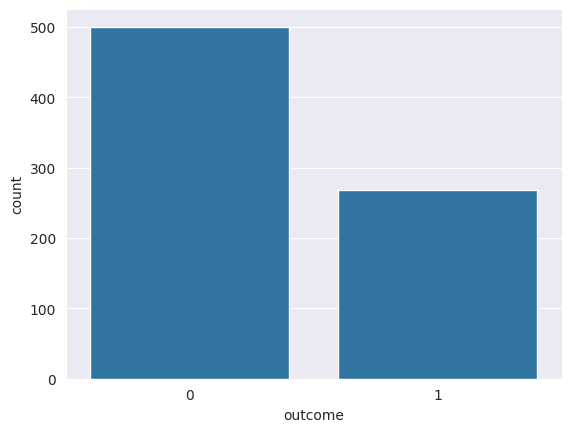

In [13]:
outcome_count = df["outcome"].value_counts().reset_index()

outcome_count.columns = ["outcome", "count"]

sns.set_style("darkgrid")

sns.barplot(data=outcome_count, x="outcome", y="count")

# Glucose Attribute
The oral glucose tolerance test (OGTT) measures the body's ability to use a type of sugar, called glucose, that is the body's main source of energy. An OGTT can be used to diagnose prediabetes and diabetes. An OGTT is most commonly done to check for diabetes that occurs with pregnancy (gestational diabetes). The test can be done on its own or as the second test in a two-part screening for pregnant women.

Each lab has a different range for what's normal. The doctor will also look at the patients' results based on their age, health, and other factors. A value that isn't in the normal range may still be normal.

Citidations:
- `https://www.healthlinkbc.ca/tests-treatments-medications/medical-tests/oral-glucose-tolerance-test`

- `https://www.mayoclinic.org/tests-procedures/glucose-tolerance-test/about/pac-20394296`


# Blood Pressure Attribute

# NaN Values
According to the dataset, there are no missing values. However, except outcome and pregnancies, the attributes cannot contain 0, thus 0s should be considered as NaN values.

In [16]:
df_with_nan = df.copy()
for column in df_with_nan.columns:
    if column not in ["pregnancies", "outcome"]:
        df_with_nan[column] = np.where(df_with_nan[column] == 0, np.nan, df_with_nan[column])

In [17]:
# Observing nan values
nan_cols = {}
for column in df_with_nan.columns:
    nan_amount = df_with_nan[column].isnull().sum()
    print(f"For column {column}, there are {nan_amount} amount of NaN values.")
    
    if nan_amount > 0:
        nan_cols[column] = nan_amount

nan_info_df = pd.DataFrame.from_dict(nan_cols, orient="index")
    

For column pregnancies, there are 0 amount of NaN values.
For column glucose, there are 5 amount of NaN values.
For column bloodpressure, there are 35 amount of NaN values.
For column skinthickness, there are 227 amount of NaN values.
For column insulin, there are 374 amount of NaN values.
For column bmi, there are 11 amount of NaN values.
For column diabetespedigreefunction, there are 0 amount of NaN values.
For column age, there are 0 amount of NaN values.
For column outcome, there are 0 amount of NaN values.


In [18]:
nan_info_df.columns = ["nan_amount"]
nan_info_df = nan_info_df.reset_index()
print(nan_info_df)

           index  nan_amount
0        glucose           5
1  bloodpressure          35
2  skinthickness         227
3        insulin         374
4            bmi          11


<Axes: xlabel='index', ylabel='nan_amount'>

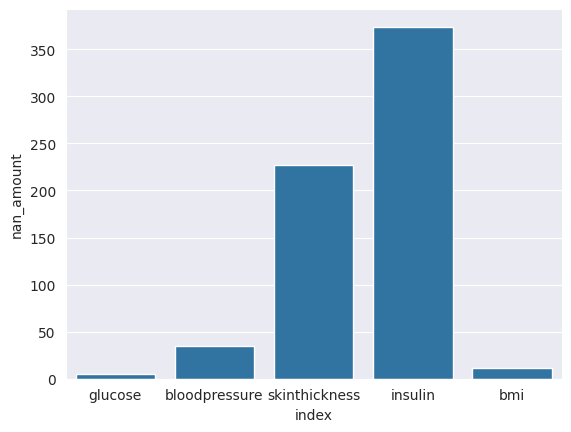

In [19]:

sns.set_style("darkgrid")

sns.barplot(x="index", y="nan_amount", data=nan_info_df)

In [23]:
nan_checked_cols = []

for column in df_with_nan.columns:
    nan_amount = df_with_nan[column].isnull().sum()
    if nan_amount > 0:
        df_with_nan[f"is_{column}_null"] = np.where(df_with_nan[column].isnull(), 1, 0)
        nan_checked_cols.append(f"is_{column}_null")


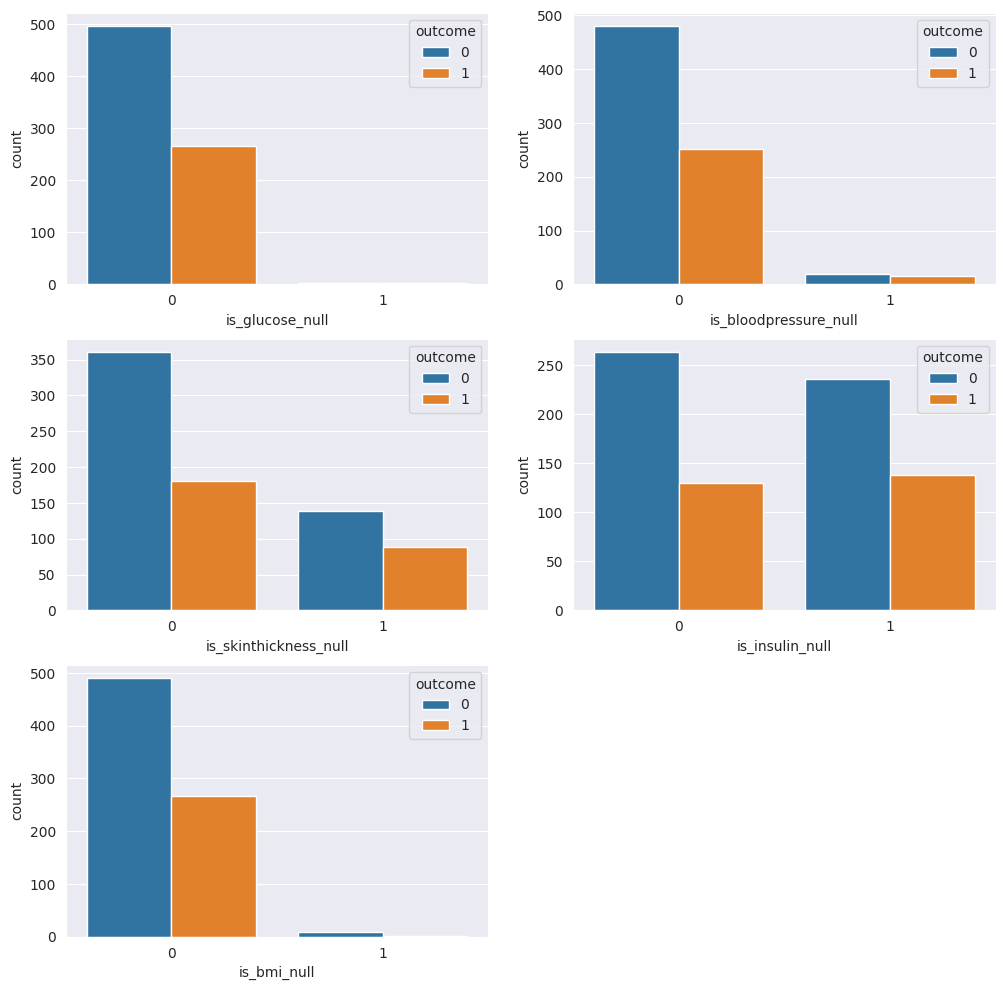

In [30]:
plt.figure(figsize=(12, 12))
for i in range(len(nan_checked_cols)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=nan_checked_cols[i], data=df_with_nan, hue="outcome")
    
plt.show()

In [31]:
# Set option to display all rows and columns
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  